In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers
from keras import metrics
%matplotlib inline

Using TensorFlow backend.


In [2]:
data_train = pd.read_csv('./input/train.csv')
X_test = pd.read_csv('./input/test.csv')
data = data_train.append(X_test, ignore_index=True, sort=False)
data = pd.get_dummies(data, dummy_na=True, drop_first=True)
data.drop('Id', axis=1, inplace=True)
data.isnull().values.any()

True

In [3]:
data.fillna(data.median(), inplace=True)
columns = data.columns
sale_price = data['SalePrice']
data.isnull().values.any()

False

In [4]:
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns = columns)
data['SalePrice'] = sale_price
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_nan,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan
0,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [5]:
train = data.iloc[:1460]
test = data.iloc[1460:]
test.drop('SalePrice', axis=1, inplace=True)

C:\Users\user\Anaconda3\envs\cuda\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [6]:
X_train, X_val, y_train, y_val = train_test_split(train.drop('SalePrice', axis=1), train['SalePrice'], test_size=0.2, random_state=42)

In [7]:
X_train.shape

(1168, 288)

In [8]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(144, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(72, activation='relu'))
    model.add(layers.Dense(18, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [9]:
all_scores = []
all_mae_histories = []
num_epochs = 300
k = 4
num_val_samples = len(X_train) // k
model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 144)               41616     
_________________________________________________________________
dense_2 (Dense)              (None, 72)                10440     
_________________________________________________________________
dense_3 (Dense)              (None, 18)                1314      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 19        
Total params: 53,389
Trainable params: 53,389
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=num_epochs, batch_size=50)

Train on 1168 samples, validate on 292 samples
Epoch 1/300
1168/1168 [==============================] - 2s 2ms/step - loss: 38876751132.0548 - mean_absolute_error: 181417.5493 - val_loss: 39625154349.5890 - val_mean_absolute_error: 178760.3579
Epoch 2/300
1168/1168 [==============================] - 0s 94us/step - loss: 38817239646.6849 - mean_absolute_error: 181256.2393 - val_loss: 39527785205.4795 - val_mean_absolute_error: 178491.1428
Epoch 3/300
1168/1168 [==============================] - 0s 99us/step - loss: 38672543887.7808 - mean_absolute_error: 180863.9060 - val_loss: 39327663749.2603 - val_mean_absolute_error: 177936.5156
Epoch 4/300
1168/1168 [==============================] - 0s 93us/step - loss: 38410747942.5753 - mean_absolute_error: 180139.0780 - val_loss: 38994037142.7945 - val_mean_absolute_error: 177007.4667
Epoch 5/300
1168/1168 [==============================] - 0s 95us/step - loss: 37989170502.1370 - mean_absolute_error: 178978.9127 - val_loss: 38481062799.7808 - v

1168/1168 [==============================] - 0s 88us/step - loss: 2519709154.8493 - mean_absolute_error: 32508.5296 - val_loss: 3425902538.5205 - val_mean_absolute_error: 34776.9237
Epoch 43/300
1168/1168 [==============================] - 0s 84us/step - loss: 2443632977.9726 - mean_absolute_error: 31914.8322 - val_loss: 3340391357.3699 - val_mean_absolute_error: 33619.6948
Epoch 44/300
1168/1168 [==============================] - 0s 86us/step - loss: 2379083046.9041 - mean_absolute_error: 31128.4291 - val_loss: 3248900378.3014 - val_mean_absolute_error: 33250.9011
Epoch 45/300
1168/1168 [==============================] - 0s 87us/step - loss: 2317050317.3699 - mean_absolute_error: 30659.0607 - val_loss: 3162101557.4795 - val_mean_absolute_error: 33008.4680
Epoch 46/300
1168/1168 [==============================] - 0s 84us/step - loss: 2255839867.2877 - mean_absolute_error: 29965.9844 - val_loss: 3093208816.2192 - val_mean_absolute_error: 33993.7192
Epoch 47/300
1168/1168 [==============

1168/1168 [==============================] - 0s 93us/step - loss: 1265717574.1370 - mean_absolute_error: 22586.3292 - val_loss: 1837548706.6301 - val_mean_absolute_error: 25762.0768
Epoch 85/300
1168/1168 [==============================] - 0s 85us/step - loss: 1255581093.5342 - mean_absolute_error: 22552.5890 - val_loss: 1823564130.6301 - val_mean_absolute_error: 25369.6851
Epoch 86/300
1168/1168 [==============================] - 0s 90us/step - loss: 1240711483.8356 - mean_absolute_error: 22313.0418 - val_loss: 1805500136.7671 - val_mean_absolute_error: 25304.0294
Epoch 87/300
1168/1168 [==============================] - 0s 90us/step - loss: 1231210122.2466 - mean_absolute_error: 22166.2130 - val_loss: 1791532460.7123 - val_mean_absolute_error: 25198.0470
Epoch 88/300
1168/1168 [==============================] - 0s 88us/step - loss: 1220034859.2329 - mean_absolute_error: 22053.4552 - val_loss: 1775287886.4658 - val_mean_absolute_error: 25460.8191
Epoch 89/300
1168/1168 [==============

Epoch 126/300
1168/1168 [==============================] - 0s 117us/step - loss: 961097376.0000 - mean_absolute_error: 19143.6387 - val_loss: 1404827125.9178 - val_mean_absolute_error: 22587.5902
Epoch 127/300
1168/1168 [==============================] - 0s 111us/step - loss: 955297034.3014 - mean_absolute_error: 19075.3393 - val_loss: 1394924011.8356 - val_mean_absolute_error: 22486.4444
Epoch 128/300
1168/1168 [==============================] - 0s 118us/step - loss: 953275099.9452 - mean_absolute_error: 19071.5711 - val_loss: 1393807886.9041 - val_mean_absolute_error: 22491.0821
Epoch 129/300
1168/1168 [==============================] - 0s 96us/step - loss: 943865116.6575 - mean_absolute_error: 18903.1237 - val_loss: 1382495019.6164 - val_mean_absolute_error: 22587.6949
Epoch 130/300
1168/1168 [==============================] - 0s 98us/step - loss: 943773504.8219 - mean_absolute_error: 18958.7492 - val_loss: 1371877553.7534 - val_mean_absolute_error: 22403.1357
Epoch 131/300
1168/116

Epoch 168/300
1168/1168 [==============================] - 0s 90us/step - loss: 815658928.6301 - mean_absolute_error: 17297.8180 - val_loss: 1198713001.8630 - val_mean_absolute_error: 20919.0255
Epoch 169/300
1168/1168 [==============================] - 0s 87us/step - loss: 813032518.7945 - mean_absolute_error: 17208.1134 - val_loss: 1193722582.1370 - val_mean_absolute_error: 20877.3546
Epoch 170/300
1168/1168 [==============================] - 0s 92us/step - loss: 807108667.3425 - mean_absolute_error: 17159.2809 - val_loss: 1209404454.5753 - val_mean_absolute_error: 21076.4313
Epoch 171/300
1168/1168 [==============================] - 0s 84us/step - loss: 810102964.5753 - mean_absolute_error: 17149.5575 - val_loss: 1187360140.7123 - val_mean_absolute_error: 20890.8764
Epoch 172/300
1168/1168 [==============================] - 0s 89us/step - loss: 806208862.4932 - mean_absolute_error: 17087.7153 - val_loss: 1189825519.3425 - val_mean_absolute_error: 20884.9422
Epoch 173/300
1168/1168 [

1168/1168 [==============================] - 0s 88us/step - loss: 733591755.6164 - mean_absolute_error: 16149.6276 - val_loss: 1084483272.7671 - val_mean_absolute_error: 20186.6057
Epoch 211/300
1168/1168 [==============================] - 0s 87us/step - loss: 733109385.5342 - mean_absolute_error: 16107.4311 - val_loss: 1100530835.0685 - val_mean_absolute_error: 20230.8098
Epoch 212/300
1168/1168 [==============================] - 0s 86us/step - loss: 730011472.2740 - mean_absolute_error: 16092.7444 - val_loss: 1085334026.3014 - val_mean_absolute_error: 20349.0376
Epoch 213/300
1168/1168 [==============================] - 0s 90us/step - loss: 729818969.5342 - mean_absolute_error: 16152.0218 - val_loss: 1085337330.8493 - val_mean_absolute_error: 20154.0728
Epoch 214/300
1168/1168 [==============================] - 0s 91us/step - loss: 727101446.0548 - mean_absolute_error: 16022.6313 - val_loss: 1088565134.4658 - val_mean_absolute_error: 20186.0971
Epoch 215/300
1168/1168 [==============

1168/1168 [==============================] - 0s 93us/step - loss: 684796879.9452 - mean_absolute_error: 15512.3825 - val_loss: 1033828469.2603 - val_mean_absolute_error: 20077.6623
Epoch 253/300
1168/1168 [==============================] - 0s 92us/step - loss: 683149913.5342 - mean_absolute_error: 15581.8494 - val_loss: 1048783716.3836 - val_mean_absolute_error: 20142.8067
Epoch 254/300
1168/1168 [==============================] - 0s 86us/step - loss: 682617619.6986 - mean_absolute_error: 15530.0065 - val_loss: 1059374713.8630 - val_mean_absolute_error: 20246.6898
Epoch 255/300
1168/1168 [==============================] - 0s 92us/step - loss: 685805936.6849 - mean_absolute_error: 15519.4137 - val_loss: 1043921675.3973 - val_mean_absolute_error: 20002.0646
Epoch 256/300
1168/1168 [==============================] - 0s 84us/step - loss: 680246870.4658 - mean_absolute_error: 15521.3370 - val_loss: 1031816498.4110 - val_mean_absolute_error: 19939.7195
Epoch 257/300
1168/1168 [==============

1168/1168 [==============================] - 0s 100us/step - loss: 648084048.6301 - mean_absolute_error: 15119.5484 - val_loss: 1011731463.4521 - val_mean_absolute_error: 19987.7568
Epoch 295/300
1168/1168 [==============================] - 0s 100us/step - loss: 648452183.3151 - mean_absolute_error: 15146.1593 - val_loss: 1001424143.1233 - val_mean_absolute_error: 19925.2013
Epoch 296/300
1168/1168 [==============================] - 0s 86us/step - loss: 645748321.9726 - mean_absolute_error: 15151.3880 - val_loss: 1005628355.5068 - val_mean_absolute_error: 19909.1527
Epoch 297/300
1168/1168 [==============================] - 0s 82us/step - loss: 645307010.3562 - mean_absolute_error: 15054.9502 - val_loss: 1006202997.9178 - val_mean_absolute_error: 19971.1895
Epoch 298/300
1168/1168 [==============================] - 0s 86us/step - loss: 646275549.8904 - mean_absolute_error: 15072.5697 - val_loss: 1006352635.3973 - val_mean_absolute_error: 19945.5911
Epoch 299/300
1168/1168 [============

In [12]:
mae_history = history.history['val_mean_absolute_error']
all_mae_histories.append(mae_history)
    
val_mse, val_mae = model.evaluate(X_val, y_val, verbose=0)
all_scores.append(val_mae)

In [13]:
mae_history = history.history['val_mean_absolute_error']
all_mae_histories.append(mae_history)

In [14]:
val_mse, val_mae = model.evaluate(X_val, y_val, verbose=0)
all_scores.append(val_mae)

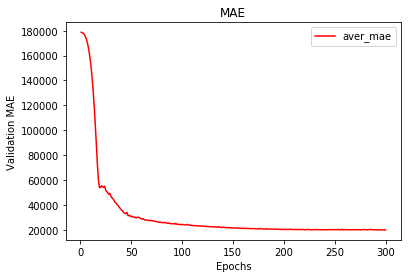

In [15]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

import matplotlib.pyplot as plt

plt.figure(1)
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history, 'r', label='aver_mae')
plt.title('MAE')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.legend()
plt.show()